In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
iris = load_iris()

In [53]:
iris_frame = pd.DataFrame(iris.data)
# Делаем имена колонок такие же, как имена переменных:
iris_frame.columns = iris.feature_names
# Добавляем столбец с целевой переменной: 
iris_frame['target'] = iris.target
# Для наглядности добавляем столбец с сортами: 
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
# Смотрим, что получилось:
iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


<Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>

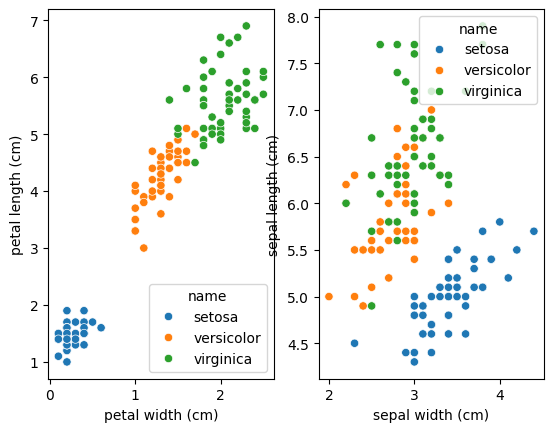

In [54]:
fig, axes = plt.subplots(1, 2)
sns.scatterplot(data=iris_frame, x='petal width (cm)', y='petal length (cm)', hue="name", ax=axes[0])
sns.scatterplot(data=iris_frame, x='sepal width (cm)', y='sepal length (cm)', hue="name", ax=axes[1])

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = iris_frame.drop(["target","name"], axis=1)
y = iris_frame.name



X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
model = KNeighborsClassifier(n_neighbors=8)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

1.0


In [63]:
from sklearn.model_selection import GridSearchCV

model_params = {"n_neighbors": range(1, 11)}

knn_grid = GridSearchCV(model, model_params, cv=5, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)
knn_grid.best_params_, knn_grid.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


({'n_neighbors': 8}, 0.9583333333333334)

In [64]:
x_new = np.array([[5, 2.9, 1, 0.2]])
prediction = model.predict(x_new)
print("Prediction: {}".format(prediction))

Prediction: ['setosa']


C:\Users\vlads\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
